In [2]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df_SBUX = pd.read_csv('dataset_clean\\clean_stock_SBUX_ytd', sep=';')
df_SBUX.head()

,Date,Open,High,Low,Close,Volume,diff
0,2023-01-03,98.493532,99.090998,97.425935,98.757988,6607700,0.264456
1,2023-01-04,100.579769,102.577848,100.442646,102.313393,8166600,1.733624
2,2023-01-05,102.342761,102.940226,101.363311,102.283997,5575100,-0.058765
3,2023-01-06,103.214489,104.801201,102.852097,104.497574,9644100,1.283085
4,2023-01-09,104.331052,104.487767,102.284004,102.587631,10124800,-1.743420


In [4]:
df_MCD = pd.read_csv('dataset_clean\\clean_stock_MCD_ytd', sep=';')
df_MCD.head()

,Date,Open,High,Low,Close,Volume,diff
0,2023-01-03,259.239921,260.046580,255.285375,260.026886,2743800,0.786965
1,2023-01-04,261.915613,262.210717,258.610326,260.085907,2584100,-1.829706
2,2023-01-05,260.449892,260.449892,257.124911,257.892212,1945600,-2.557680
3,2023-01-06,259.466185,265.496397,259.102213,265.083221,2855400,5.617037
4,2023-01-09,265.535717,265.555411,262.427156,262.899353,2654600,-2.636364


In [5]:
SBUX_MCD = df_SBUX.merge(df_MCD, on='Date', suffixes=('_SBUX', '_MCD'))
SBUX_MCD

,Date,Open_SBUX,High_SBUX,Low_SBUX,Close_SBUX,Volume_SBUX,diff_SBUX,Open_MCD,High_MCD,Low_MCD,Close_MCD,Volume_MCD,diff_MCD
0,2023-01-03,98.493532,99.090998,97.425935,98.757988,6607700,0.264456,259.239921,260.046580,255.285375,260.026886,2743800,0.786965
1,2023-01-04,100.579769,102.577848,100.442646,102.313393,8166600,1.733624,261.915613,262.210717,258.610326,260.085907,2584100,-1.829706
2,2023-01-05,102.342761,102.940226,101.363311,102.283997,5575100,-0.058765,260.449892,260.449892,257.124911,257.892212,1945600,-2.557680
3,2023-01-06,103.214489,104.801201,102.852097,104.497574,9644100,1.283085,259.466185,265.496397,259.102213,265.083221,2855400,5.617037
4,2023-01-09,104.331052,104.487767,102.284004,102.587631,10124800,-1.743420,265.535717,265.555411,262.427156,262.899353,2654600,-2.636364
...,...,...,...,...,...,...,...,...,...,...,...,...,...
217,2023-11-13,103.919998,104.230003,102.959999,103.510002,7120800,-0.409996,267.399994,269.720001,267.260010,269.200012,2591900,1.800018
218,2023-11-14,104.480003,105.820000,104.239998,105.599998,8323000,1.119995,270.000000,271.660004,269.350006,271.489990,2647800,1.489990
219,2023-11-15,105.660004,106.540001,105.660004,106.029999,7980200,0.369995,272.429993,273.100006,269.019989,270.390015,2575900,-2.039978
220,2023-11-16,106.279999,107.660004,106.199997,107.209999,8036300,0.930000,271.070007,276.160004,271.029999,276.119995,3593700,5.049988


### Line plot MCD vs SBUX

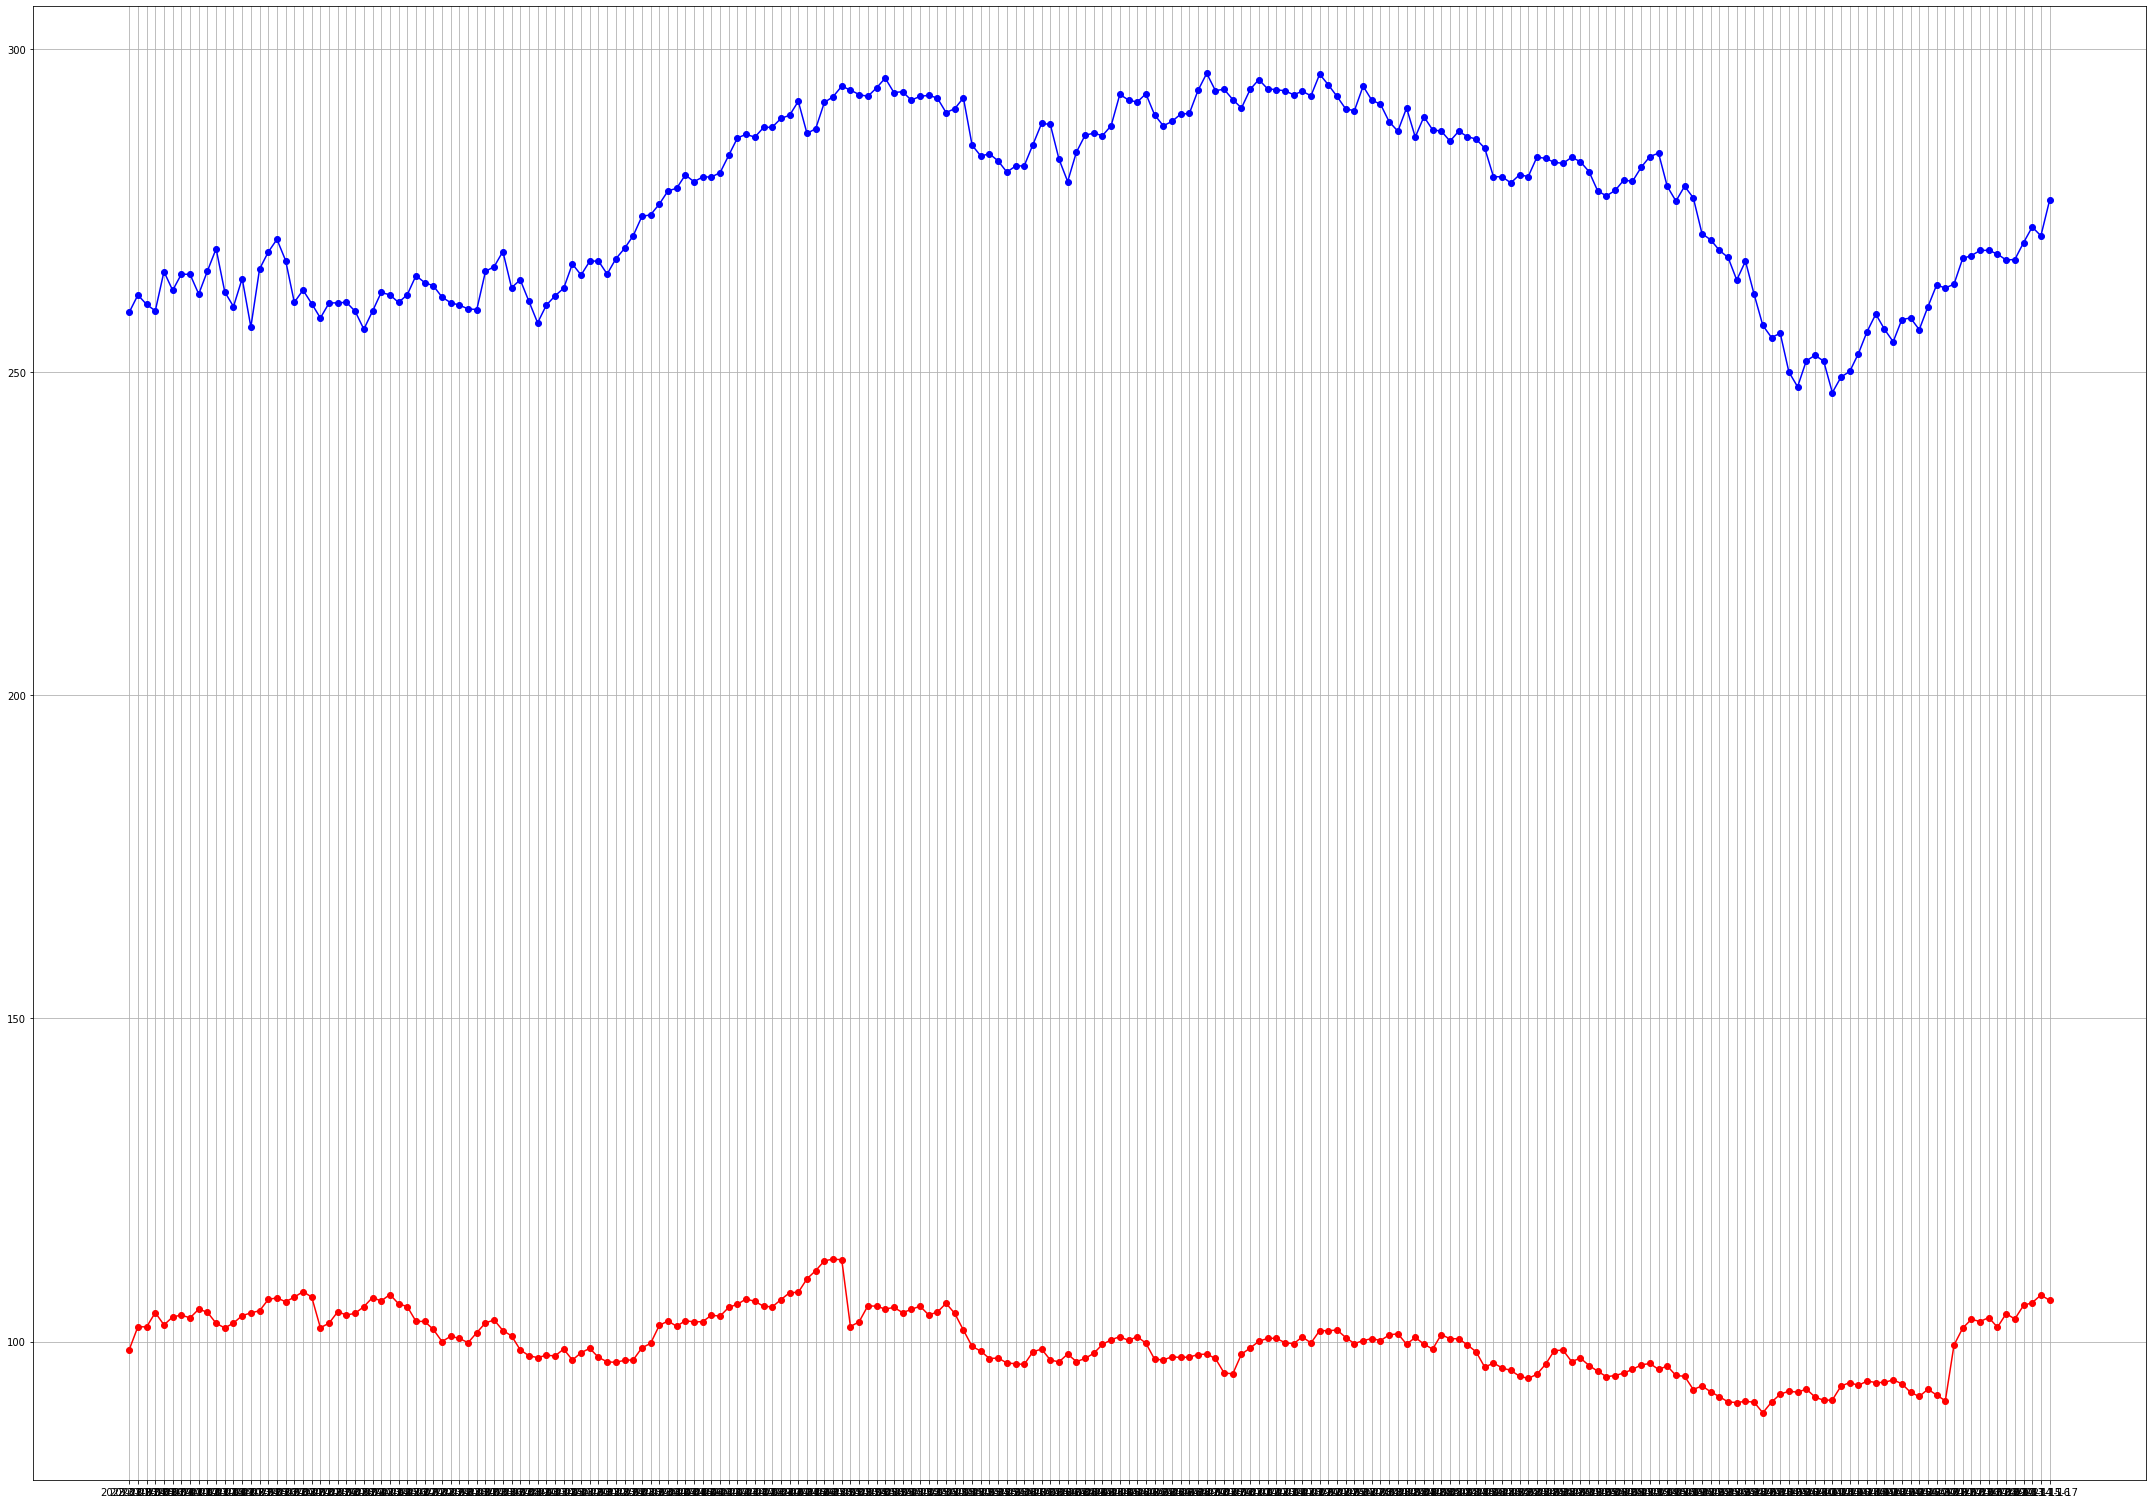

In [6]:
plt.figure(figsize=(30,21))

plt.plot(SBUX_MCD['Date'], SBUX_MCD['Open_MCD'], label='Data1', marker='o', linestyle='-', color='blue')
plt.plot(SBUX_MCD['Date'], SBUX_MCD['Close_SBUX'], label='Data1', marker='o', linestyle='-', color='red')

plt.tight_layout()
plt.grid()
plt.show()


<Axes: >

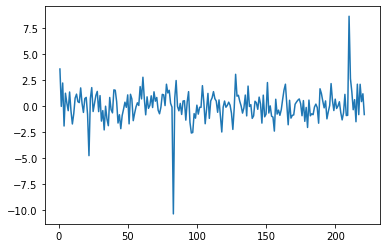

In [7]:
SBUX_MCD['Close_SBUX'].diff().plot()

<Axes: >

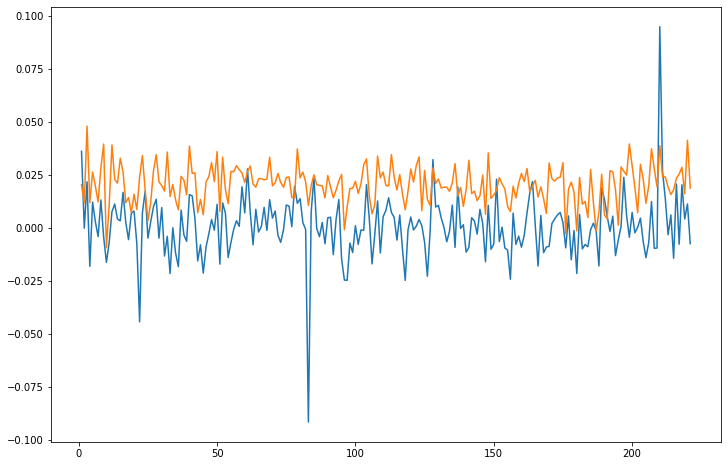

In [8]:
SBUX_MCD['Close_SBUX'].pct_change().plot(x=SBUX_MCD.index,figsize=(12,8))
(SBUX_MCD['Close_MCD'].pct_change() + 0.02).plot(x= SBUX_MCD.index,figsize=(12,8))

### Percentage change visualization


<Axes: xlabel='Close_MCD', ylabel='Close_SBUX'>

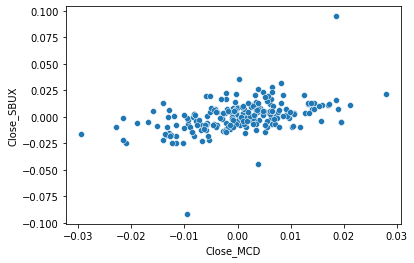

In [9]:
import seaborn as sns

sns.scatterplot(x=SBUX_MCD['Close_MCD'].pct_change(), y=SBUX_MCD['Close_SBUX'].pct_change())

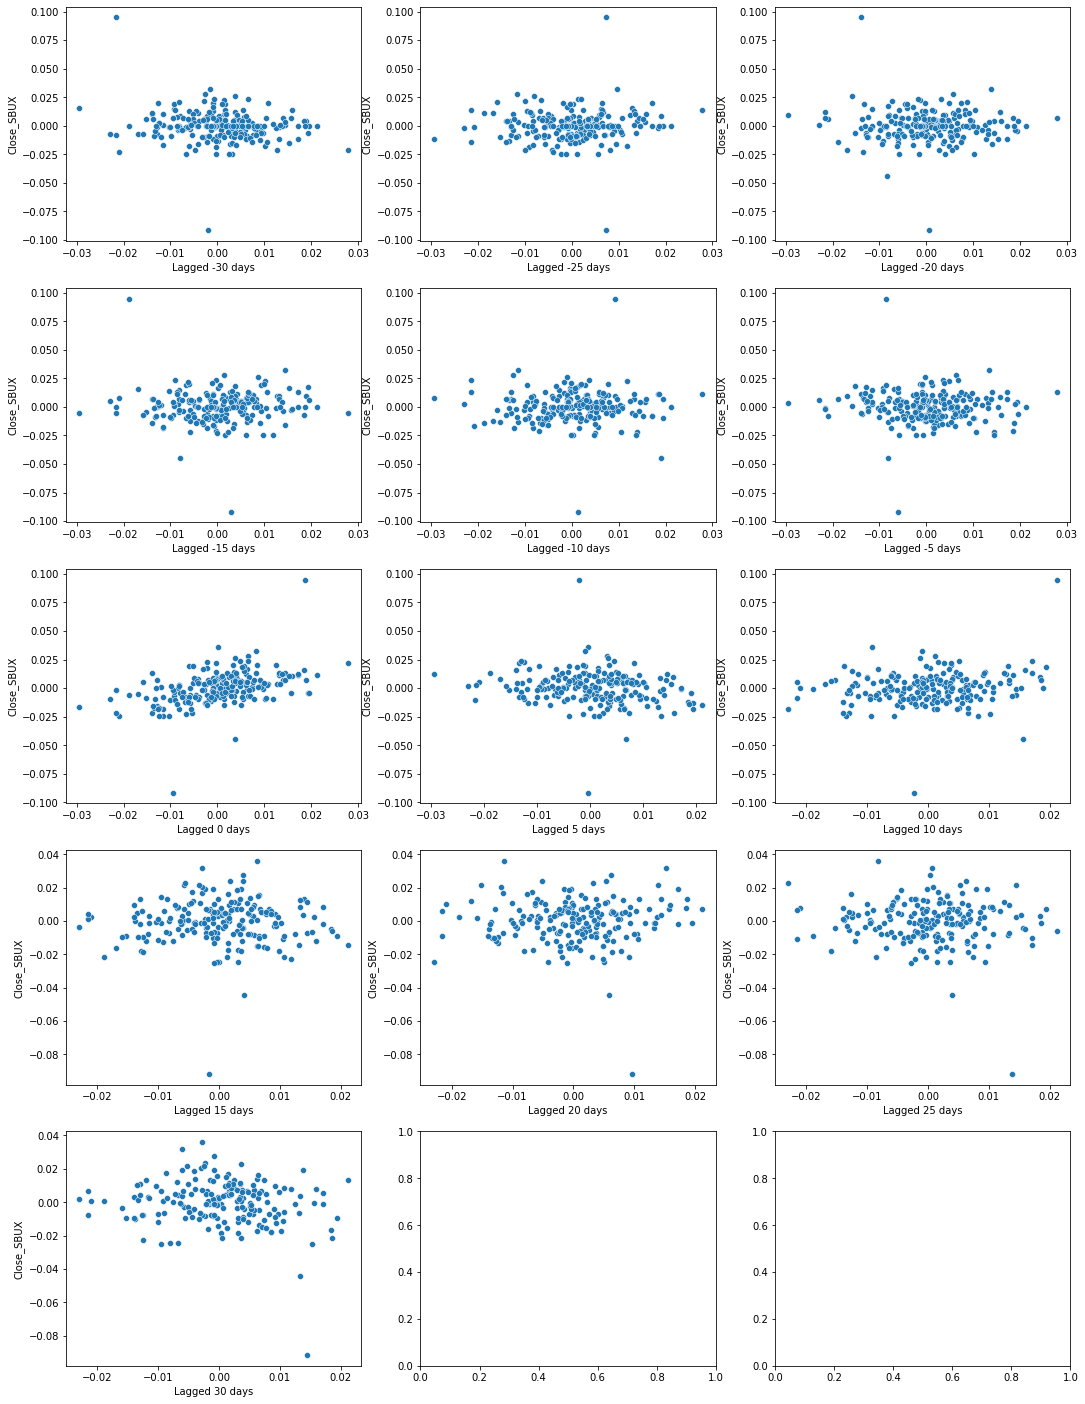

In [10]:
#Membuat scatter plot Lagged Correlation

fig, axes = plt.subplots(5,3, figsize=(18,25))

i = 1
for lagged in range(-30,31,5):
    plt.subplot(5,3,i)
    sns.scatterplot(x=SBUX_MCD['Close_MCD'].pct_change(), y=SBUX_MCD['Close_SBUX'].shift(lagged).pct_change())
    plt.xlabel(f'Lagged {lagged} days')
    i += 1

plt.show()

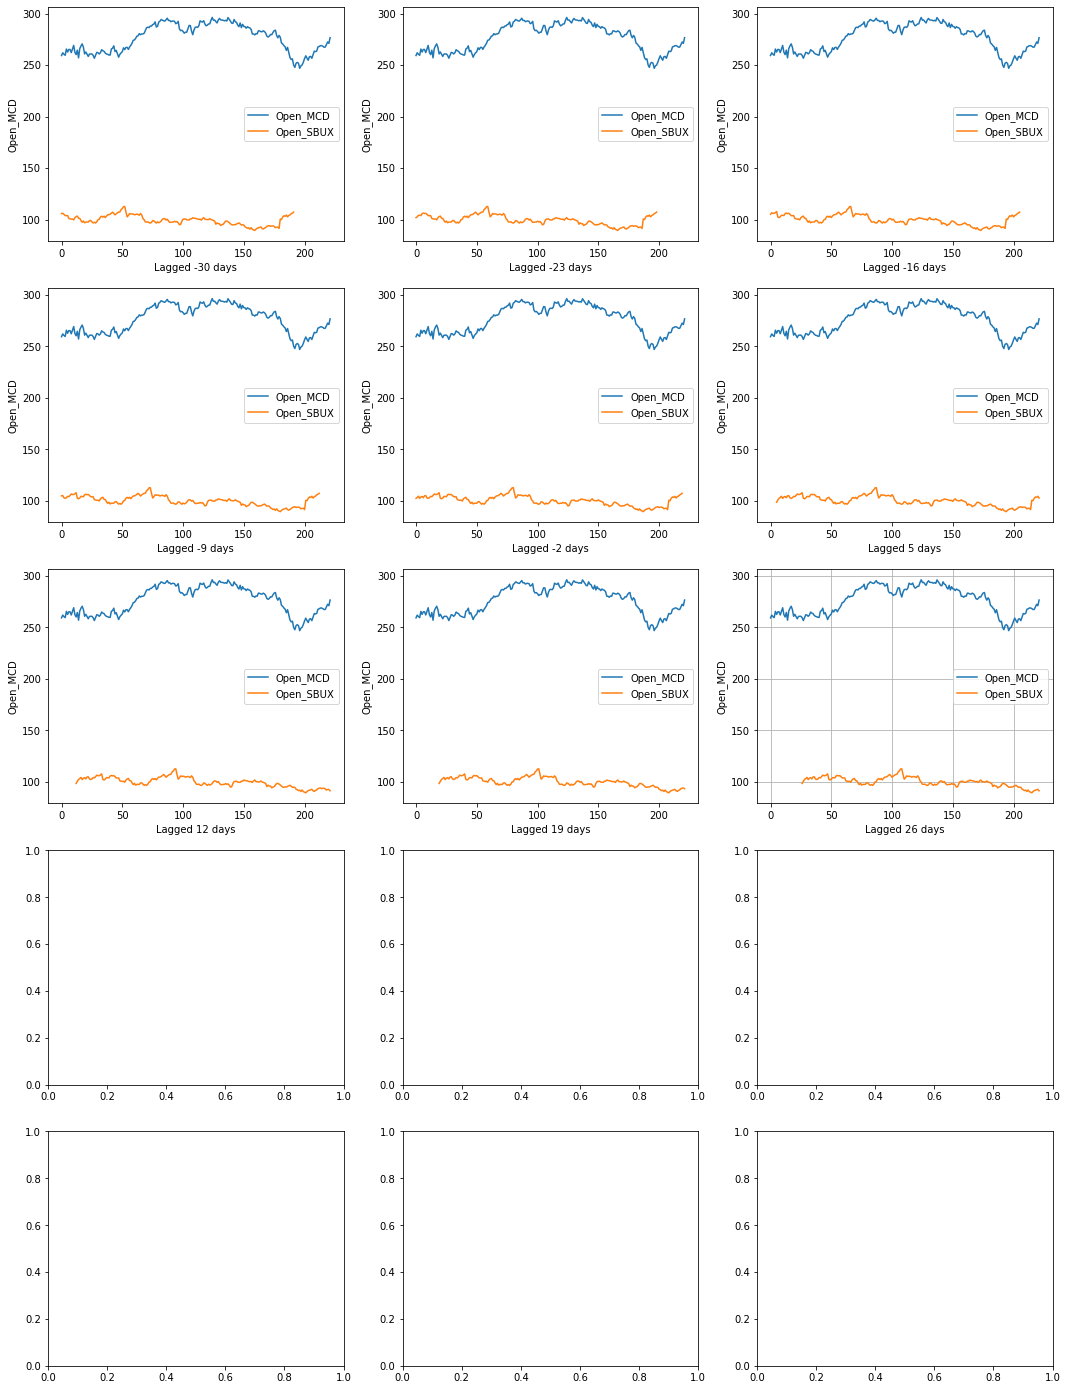

In [11]:
#Membuat scatter plot Lagged Correlation

fig, axes = plt.subplots(5,3, figsize=(18,25))

i = 1
for lagged in range(-30,31,7):
    plt.subplot(5,3,i)
    sns.lineplot(x= SBUX_MCD.index, y=SBUX_MCD['Open_MCD'], label='Open_MCD', markers='o')
    sns.lineplot(x=SBUX_MCD.index, y=SBUX_MCD['Open_SBUX'].shift(lagged), label='Open_SBUX', markers='x')
    plt.xlabel(f'Lagged {lagged} days')
    i += 1

plt.grid()
plt.show()

In [12]:
SBUX_MCD.head()

,Date,Open_SBUX,High_SBUX,Low_SBUX,Close_SBUX,Volume_SBUX,diff_SBUX,Open_MCD,High_MCD,Low_MCD,Close_MCD,Volume_MCD,diff_MCD
0,2023-01-03,98.493532,99.090998,97.425935,98.757988,6607700,0.264456,259.239921,260.046580,255.285375,260.026886,2743800,0.786965
1,2023-01-04,100.579769,102.577848,100.442646,102.313393,8166600,1.733624,261.915613,262.210717,258.610326,260.085907,2584100,-1.829706
2,2023-01-05,102.342761,102.940226,101.363311,102.283997,5575100,-0.058765,260.449892,260.449892,257.124911,257.892212,1945600,-2.557680
3,2023-01-06,103.214489,104.801201,102.852097,104.497574,9644100,1.283085,259.466185,265.496397,259.102213,265.083221,2855400,5.617037
4,2023-01-09,104.331052,104.487767,102.284004,102.587631,10124800,-1.743420,265.535717,265.555411,262.427156,262.899353,2654600,-2.636364


### Normalized Value Analysis

In [14]:
SBUX_MCD.set_index('Date', inplace=True)

September_Oktober = SBUX_MCD.loc['2023-09-01':'2023-10-31']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
September_Oktober[['Close_MCD', 'Close_SBUX']] = scaler.fit_transform(September_Oktober[['Close_MCD', 'Close_SBUX']])

September_Oktober.head(50)



C:\Users\lenovo\AppData\Local\Temp\ipykernel_32720\4042802380.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  September_Oktober[['Close_MCD', 'Close_SBUX']] = scaler.fit_transform(September_Oktober[['Close_MCD', 'Close_SBUX']])


,Open_SBUX,High_SBUX,Low_SBUX,Close_SBUX,Volume_SBUX,diff_SBUX,Open_MCD,High_MCD,Low_MCD,Close_MCD,Volume_MCD,diff_MCD
Date,,,,,,,,,,,,
2023-09-01,97.862240,98.210325,96.509672,1.000000,4747100,-0.397815,282.540009,283.140015,279.130005,0.900959,2136400,-1.600006
2023-09-05,96.987045,97.275461,96.062127,0.863849,5414300,-0.676284,281.000000,281.640015,279.059998,0.854809,2410300,-1.839996
2023-09-06,95.893061,96.022356,94.848804,0.759390,5428400,-0.467433,278.000000,278.649994,275.000000,0.758361,2705800,-2.559998
2023-09-07,94.968145,95.296343,94.500712,0.659625,6404100,-0.387868,277.250000,278.989990,276.100006,0.833290,3732800,1.079987
2023-09-08,94.729458,95.326177,94.232190,0.680751,4754700,0.029835,278.079987,280.350006,277.850006,0.856365,2351300,1.140015
2023-09-11,95.127268,95.704100,94.699618,0.726525,5577500,0.019887,279.690002,280.130005,278.559998,0.870366,2433200,0.070007
2023-09-12,94.978089,95.982571,94.679725,0.793427,5007600,0.735954,279.489990,281.500000,277.690002,0.894996,1450200,1.220001
2023-09-13,95.674262,96.768257,95.515141,0.874414,5830200,0.726014,281.670013,282.890015,280.609985,0.922478,1724300,0.099976
2023-09-14,96.241145,97.245628,95.723990,0.901409,6039700,0.387876,283.329987,285.600006,282.570007,1.000000,2219700,1.430023


In [15]:
September_Oktober.info()

<class 'pandas.core.frame.DataFrame'>
Index: 42 entries, 2023-09-01 to 2023-10-31
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Open_SBUX    42 non-null     float64
 1   High_SBUX    42 non-null     float64
 2   Low_SBUX     42 non-null     float64
 3   Close_SBUX   42 non-null     float64
 4   Volume_SBUX  42 non-null     int64  
 5   diff_SBUX    42 non-null     float64
 6   Open_MCD     42 non-null     float64
 7   High_MCD     42 non-null     float64
 8   Low_MCD      42 non-null     float64
 9   Close_MCD    42 non-null     float64
 10  Volume_MCD   42 non-null     int64  
 11  diff_MCD     42 non-null     float64
dtypes: float64(10), int64(2)
memory usage: 4.3+ KB


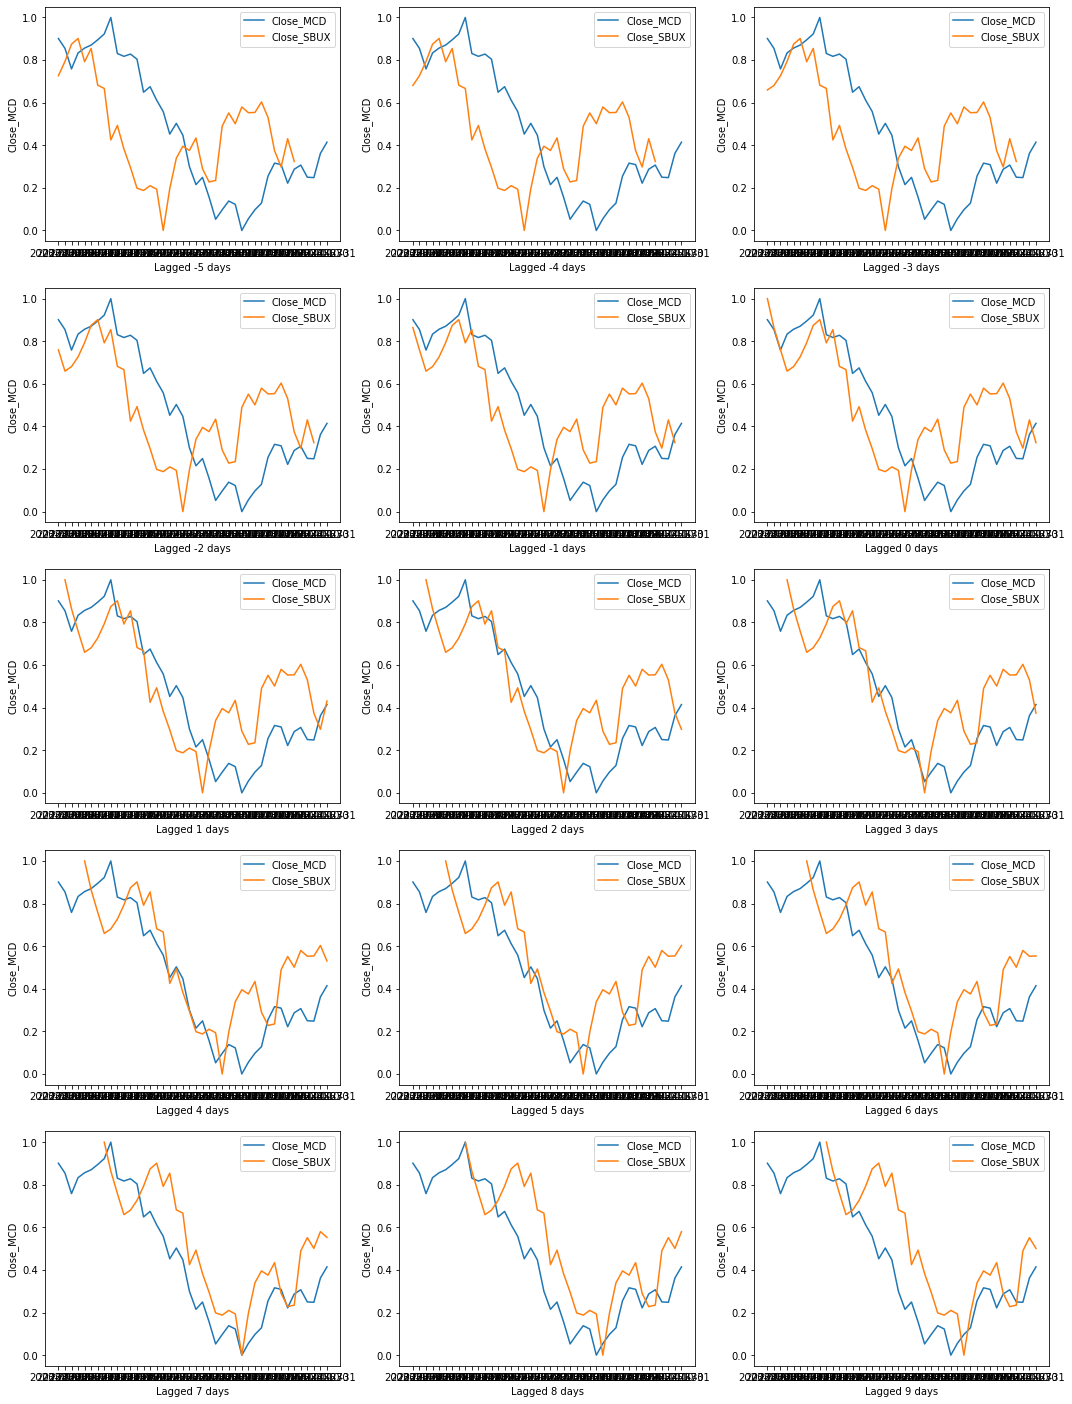

In [16]:
#Membuat line plot Lagged 

fig, axes = plt.subplots(5,3, figsize=(18,25))

i = 1
for lagged in range(-5,10):
    plt.subplot(5,3,i)
    sns.lineplot(x=September_Oktober.index, y=September_Oktober['Close_MCD'], label='Close_MCD', markers='o')
    sns.lineplot(x=September_Oktober.index, y=September_Oktober['Close_SBUX'].shift(lagged), label='Close_SBUX', markers='o')
    plt.xlabel(f'Lagged {lagged} days')
    i += 1


plt.show()

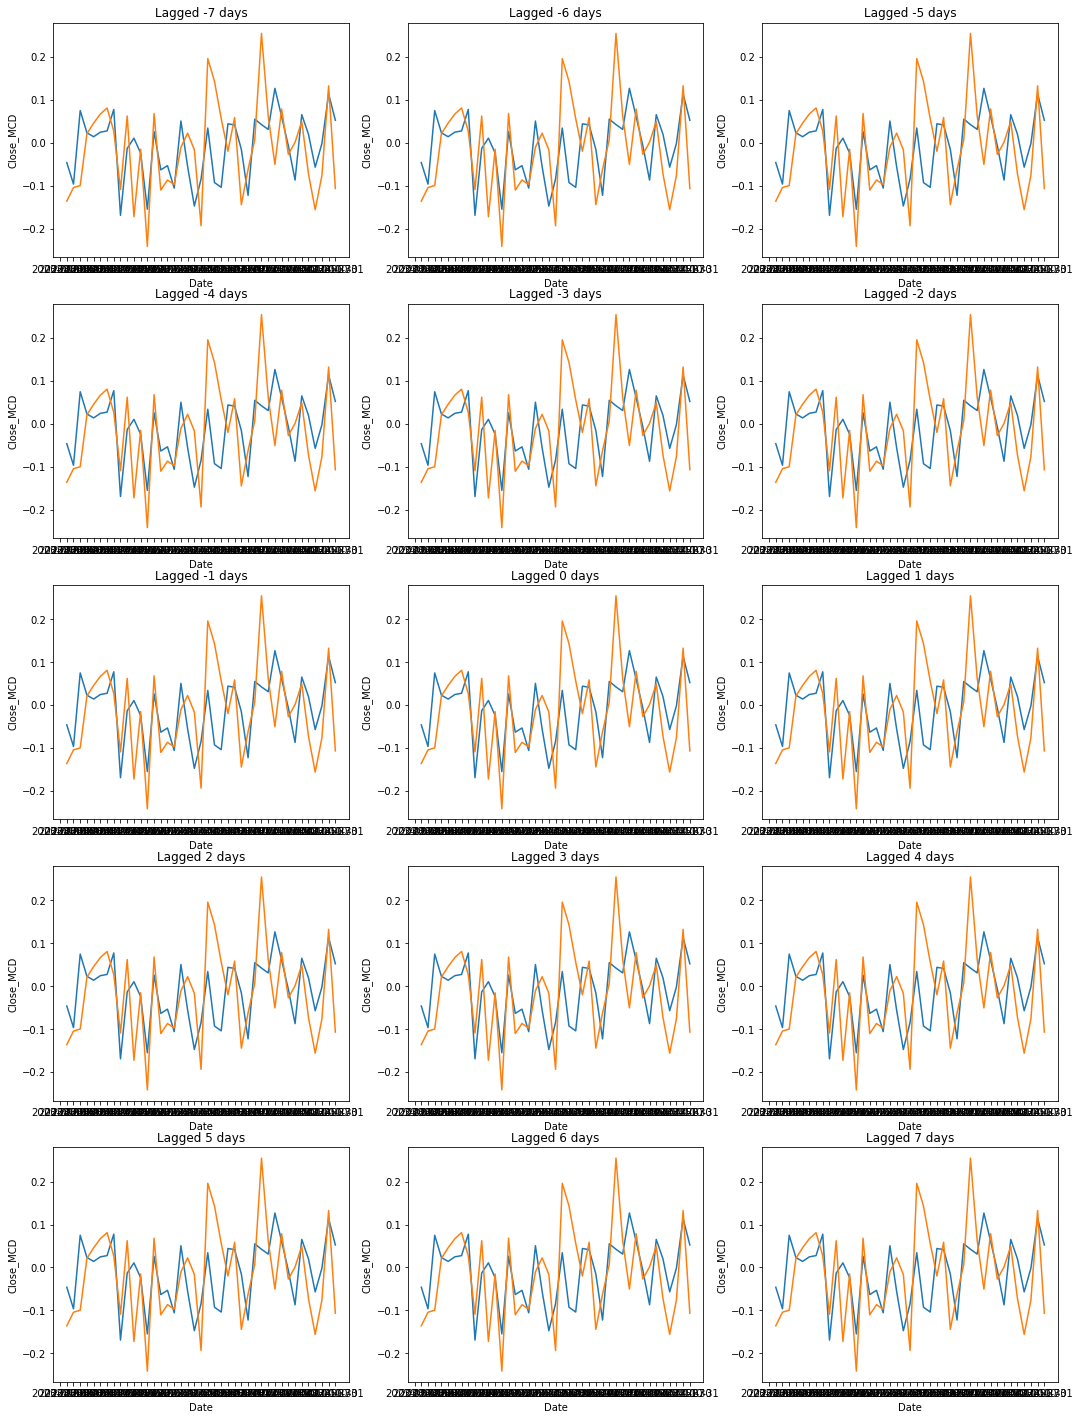

In [17]:
fig, axes = plt.subplots(5,3,figsize=(18,25))

i = 1
for lagged in range (-7,8):
    plt.subplot(5,3,i)
    #sns.scatterplot(x=September_Oktober['Close_MCD'].diff(), y=September_Oktober['Close_SBUX'].diff(lagged).pct_change())
    sns.lineplot(x=September_Oktober.index, y= September_Oktober['Close_MCD'].diff())
    sns.lineplot(x=September_Oktober.index, y= September_Oktober['Close_SBUX'].diff())
    plt.title(f'Lagged {lagged} days')
    i += 1

plt.show()

In [18]:
i = 1
corr_list=[]
for lagged in range(-7,10):
    correlation = September_Oktober['Close_MCD'].corr(September_Oktober['Close_SBUX'].shift(lagged))
    corr_list.append(correlation)
    i += 1
corr_list = [round(item,2) for item in corr_list]
print(corr_list)

[0.07, 0.17, 0.27, 0.39, 0.46, 0.55, 0.64, 0.73, 0.75, 0.77, 0.81, 0.82, 0.82, 0.85, 0.87, 0.85, 0.81]


In [27]:
import numpy as np

rol_val= [item for item in September_Oktober['Close_MCD'].rolling(7)]
print()

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (42,) + inhomogeneous part.